In [2]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

CACHE_DIR = None

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True, cache_dir=None)

data_dir = pathlib.Path(data_dir)

In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


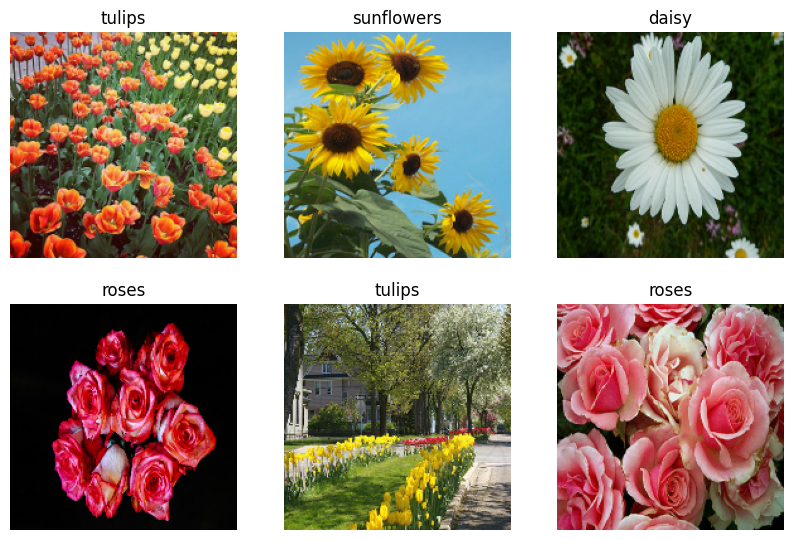

In [20]:
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
print(data_dir)

C:\Users\zceemc0\.keras\datasets\flower_photos


C:\Users\zceemc0\.keras\datasets\flower_photos\roses\10894627425_ec76bbc757_n.jpg


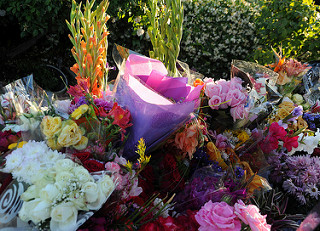

In [23]:
roses = list(data_dir.glob('roses/*'))
print(roses[3])
PIL.Image.open(str(roses[3]))

In [9]:
resnet_model = Sequential()  #Sequential groups a linear stack of layers into a tf.keras.Model, 
#provides training and inference features on this model

#we use include_top = False because we want to make our own model input and output layer because we have a 
# different image size to the one used by ResNet_50

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten()) #flattening into one dimension
resnet_model.add(Dense(512, activation='relu')) # 512 neurons that will learn the new weights
resnet_model.add(Dense(5, activation='softmax')) # 5 neurons because there are 5 classes
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=10

history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 109s 1s/step - loss: 0.8014 - accuracy: 0.7636 - val_loss: 0.3850 - val_accuracy: 0.8583
Epoch 2/10
92/92 [==============================] - 107s 1s/step - loss: 0.2712 - accuracy: 0.9050 - val_loss: 0.3736 - val_accuracy: 0.8638
Epoch 3/10
92/92 [==============================] - 107s 1s/step - loss: 0.1699 - accuracy: 0.9462 - val_loss: 0.5006 - val_accuracy: 0.8420
Epoch 4/10
92/92 [==============================] - 107s 1s/step - loss: 0.0999 - accuracy: 0.9690 - val_loss: 0.4092 - val_accuracy: 0.8542
Epoch 5/10
92/92 [==============================] - 104s 1s/step - loss: 0.0555 - accuracy: 0.9854 - val_loss: 0.4255 - val_accuracy: 0.8747
Epoch 6/10
92/92 [==============================] - 109s 1s/step - loss: 0.0441 - accuracy: 0.9881 - val_loss: 0.3988 - val_accuracy: 0.8842
Epoch 7/10
92/92 [==============================] - 107s 1s/step - loss: 0.0219 - accuracy: 0.9966 - val_loss: 0.3969 - val_accuracy: 0.8869
Epoch 8/10
92

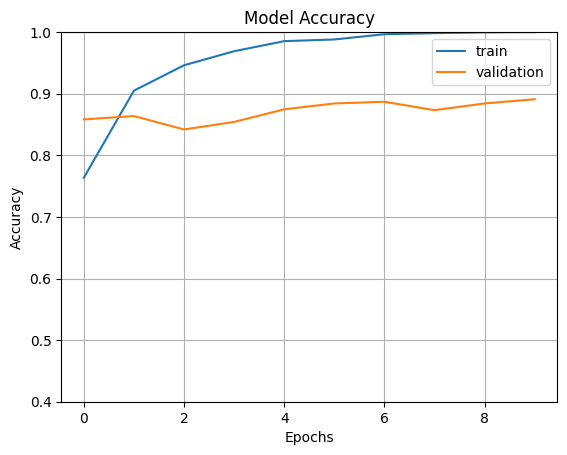

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

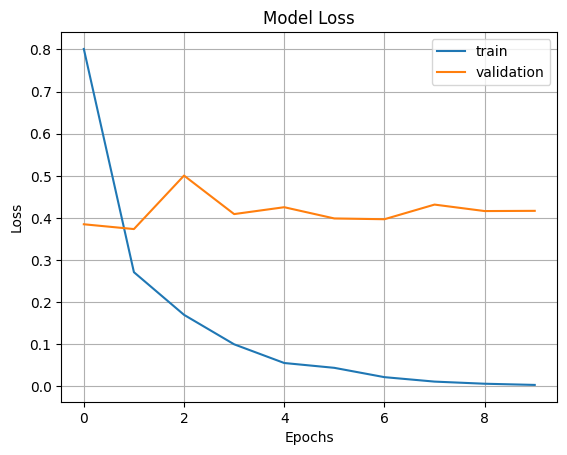

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [16]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

     --------------------------------------- 35.6/35.6 MB 38.4 MB/s eta 0:00:00
(1, 180, 180, 3)


In [17]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 670ms/step
[[8.5999447e-05 1.8246382e-07 9.9733341e-01 7.8473530e-09 2.5804241e-03]]
